## Data Understanding

### Data Loading

Import Library yang dibutuhkan dan load dataset yang akan digunakan.

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import tensorflow as tf
from sklearn.utils import resample



Kemudian mengimport data ratings dengan pandas lalu menampilkan untuk melihat struktur data dari ratings.

In [120]:
df_ratings = pd.read_csv('ml-latest/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


Dari output code di atas didapatkan informasi sebagai berikut.
- Data ratings terdiri dari 33832162 baris dan 4 kolom.
- Terdapat 3 kolom fitur yaitu `userId`, `movieId`, dan `timestamp`
- Terdapat 1 kolom target yaitu `rating`


Selanjutnya, mengimport data movies dengan pandas lalu menampilkan untuk melihat struktur data dari movies.

In [121]:
df_movies = pd.read_csv('ml-latest/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


Dari output code di atas didapatkan informasi sebagai berikut.
- Data movies terdiri dari 86537 baris dan 3 kolom.
- Terdapat 3 kolom fitur yaitu `movieId`,`title`, dan `genres`

Lalu, mengimport data tags dengan pandas lalu menampilkan untuk melihat struktur data dari tags.

In [122]:
df_tags = pd.read_csv('ml-latest/tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328310,330923,176599,politically correct,1507547491
2328311,330933,3317,coming of age,1351279384
2328312,330933,3317,sexuality,1351279389
2328313,330947,5782,Not Luc Besson,1154110902


Dari output code di atas didapatkan informasi sebagai berikut.
- Data tags terdiri dari 2328315 baris dan 4 kolom.
- Terdapat 4 kolom fitur yaitu `userId`, `movieId`, `tag`, dan `timestamp`

### Exploratory Data Analysis

#### Mengecek Tipe Data

Pada tahap ini, akan dilakukan pengecekan tipe data dari masing-masing kolom pada data ratings, movies, dan tags.

In [123]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


Dari output code di atas tipe data dari semua kolom pada data movies sudah sesuai.

In [124]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


Dari output code di atas tipe data dari semua kolom pada data ratings sudah sesuai.

In [125]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 71.1+ MB


Dari output code di atas tipe data dari semua kolom pada data tags sudah sesuai.

#### Mengecek Missing Value

Lalu akan dilakukan pengecekan missing value pada data ratings, movies, dan tags. Hal ini dilakukan agar dataset yang akan digunakan tidak mengandung missing value sehingga tidak menimbulkan error pada saat pemodelan.

In [126]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

Dari output code di atas tidak terdapat missing value pada data movies.

In [127]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Dari output code di atas tidak terdapat missing value pada data ratings.

In [128]:
df_tags.isna().sum()

userId        0
movieId       0
tag          17
timestamp     0
dtype: int64

In [129]:
df_tags.dropna(inplace=True)

Dari output code di atas tidak terdapat missing value pada data tags.

#### Mengecek Duplikasi Data

Lalu akan dilakukan pengecekan duplikasi data pada data ratings, movies, dan tags. Hal ini dilakukan agar dataset yang digunakan tidak mengandung duplikasi data yang dapat mempengaruhi hasil analisis.

In [130]:
df_movies.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data movies.

In [131]:
df_ratings.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data ratings.

In [132]:
df_tags.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data ratings.

#### Mengecek Distribusi Data

Selanjutnya, akan dilakukan pengecekan distribusi data hanya pada data ratings karena hanya kolom ratings yang memiliki tipe data numerik dan yang akan digunakan.

In [133]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


Dari output code di atas didapatkan informasi sebagai berikut.
- Rata-rata dari kolom ratings adalah 3.50
- Standar deviasi dari kolom ratings adalah 1.04
- Nilai minimum dari kolom ratings adalah 0.50
- Nilai 25% dari kolom ratings adalah 3.00
- Nilai 50% dari kolom ratings adalah 4.00
- Nilai 75% dari kolom ratings adalah 4.00
- Nilai maksimum dari kolom ratings adalah 5.00

Sehingga dapat disimpulkan bahwa distribusi data dari kolom ratings cenderung menumpuk di nilai 3.00 - 4.00. Hal ini bukanlah menjadi masalah karena data rating merupakan data yang bersifat subjektif dan dapat bervariasi.

Untuk memastikan distribusi data dari kolom ratings, akan dilakukan visualisasi distribusi data dari kolom ratings.

<Axes: >

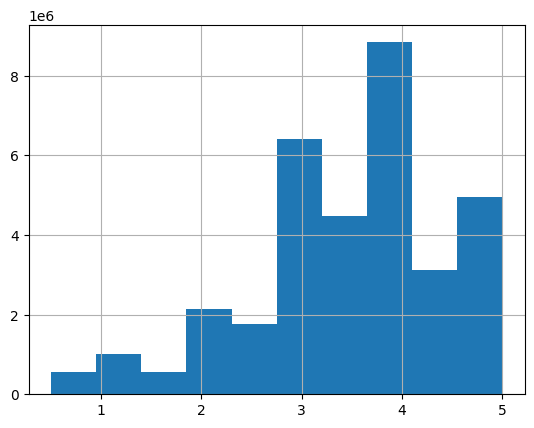

In [134]:
df_ratings['rating'].hist(bins=10)

Dari histogram di atas, grafik terlihat left-skewed yang menunjukkan bahwa mayoritas film memiliki rating di antara 3.0 - 4.0.

<Axes: ylabel='rating'>

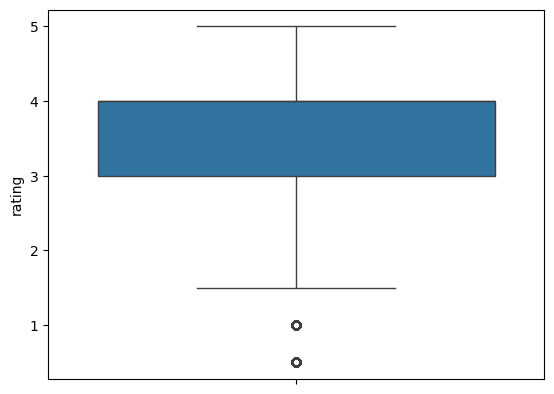

In [135]:
sns.boxplot(df_ratings['rating'])

Dari output code di atas didapatkan informasi bahwa, akibat dari left-skewed distribusi data, mayoritas film memiliki rating di antara 3.0 - 4.0, nilai yang bernilai rendah akan dianggap sebagai outlier.

## Data Preparation

### Downsampling Data

Langkah selnjutnya adalah melakukan downsampling data. Hal ini dilakukan untuk mengatasi distribusi data yang tidak seimbang pada kolom ratings. Selain itu juga hal ini dilakukan untuk mengurangi waktu komputasi pada saat pemodelan.

In [136]:
df_ratings['rating'].value_counts()

rating
4.0    8835955
3.0    6400664
5.0    4957902
3.5    4465001
4.5    3123055
2.0    2146492
2.5    1760733
1.0    1013645
0.5     566306
1.5     562409
Name: count, dtype: int64

Dari output dapat dilihat value terendah dari kolom rating s yaitu pada nilai 1.5 sehingga valu tersebut dapat dijadikan sebagai nilai batas untuk melakukan downsampling. Akan tetapi, karena data yang akan digunakan sangat besar, maka akan dilakukan downsampling dengan nilai count 10000 pada setiap rating.

In [137]:
df_ratings_new = pd.DataFrame()
target_count = 10000

for rating, group in df_ratings.groupby('rating'):
    if len(group) > target_count:
        ratings_new = resample(group, replace=False, n_samples=target_count, random_state=42)
    else:
        ratings_new = group
    df_ratings_new = pd.concat([df_ratings_new, ratings_new])

In [138]:
print(df_ratings_new['rating'].value_counts()) 
df_ratings = df_ratings_new.sort_values(by='userId').reset_index(drop=True)

rating
0.5    10000
1.0    10000
1.5    10000
2.0    10000
2.5    10000
3.0    10000
3.5    10000
4.0    10000
4.5    10000
5.0    10000
Name: count, dtype: int64


Dari output code di atas didapatkan informasi bahwa setelah dilakukan downsampling, distribusi data dari kolom ratings menjadi lebih seimbang. Untuk memastikan akan dilakukan visualisasi distribusi data dari kolom ratings setelah dilakukan downsampling.

<Axes: >

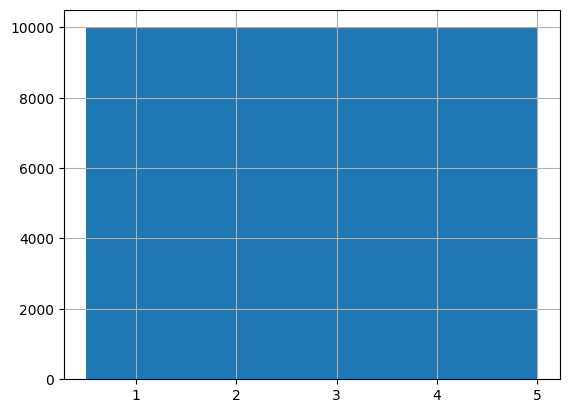

In [139]:
df_ratings['rating'].hist(bins=10)

Setelah melakukanny pada kolom ratings, selanjutnya akan dilakukan down sampling pada data movies dan tags, hal ini bertujuan menghindari data movies dan tags yang tidak terdapat pada data ratings.`

In [140]:
df_movies = df_movies[df_movies['movieId'].isin(df_ratings['movieId'])]
df_movies = df_movies.sort_values(by='movieId').reset_index(drop=True)
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
12142,287633,Asteroid City (2023),Comedy|Drama|Romance|Sci-Fi
12143,287635,The Boogeyman (2023),Horror|Mystery
12144,287665,Tin & Tina (2023),Horror|Mystery|Thriller
12145,287815,Missione di pace (2011),(no genres listed)


In [141]:
df_tags = df_tags[df_tags['movieId'].isin(df_ratings['movieId'])]
df_tags = df_tags.sort_values(by='userId').reset_index(drop=True)
df_tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,58559,violence,1311530444
4,14,58559,vigilante,1311530423
...,...,...,...,...
1865241,330923,86833,girl power,1507017745
1865242,330933,3317,coming of age,1351279384
1865243,330933,3317,sexuality,1351279389
1865244,330947,5782,Not Luc Besson,1154110902


### Merge Data

Langkah selanjutnya adalah menggabungkan dataset sesuai dengan kebutuhan. Data ratings akan digabungkan dengan data movies dan data movies juga akan digabungkan dengan data tags.

#### Data Movies dan Data Tags

Penggabungan data movies dengan data tags dilakukan untuk mengetahui kesamaan antar film berdasarkan tag dan genres yang diberikan oleh user. Hal ini akan berguna untuk memberikan rekomendasi film yang memiliki kesamaan berdasarkan genres dan tag yang diberikan oleh user.

Langkah pertama adalah menggabungkan setiap tag yang diberikan oleh user berdasarkan `movieId`.

In [142]:
df_tags = df_tags.groupby('movieId')['tag'].agg(lambda x: ' '.join(x)).reset_index()
df_tags.head()

,movieId,tag
0,1,toys friendship animation toys Pixar Disney an...
1,2,time travel scary Robin Williams not for kids ...
2,3,sequel old moldy old age old men wedding old p...
3,4,characters chick flick girl movie characters c...
4,5,wedding pregnancy family 4th wall aging baby d...


Dari output code di atas dapat dilihat kolom tags sudah digabungkan berdasarkan `movieId`.

Langkah selanjutnya yaitu mengganti pemisah pada kolom genre menjadi sebuah whitespace.

In [143]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.replace("|"," "))


Lalu akan digabungakan data movies dengan data tags berdasarkan `movieId`.

In [144]:
df_movies_similarity = pd.merge(df_movies,df_tags,how='left',on='movieId')
df_movies_similarity.fillna(' ',inplace=True)
df_movies_similarity.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,toys friendship animation toys Pixar Disney an...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel scary Robin Williams not for kids ...
2,3,Grumpier Old Men (1995),Comedy Romance,sequel old moldy old age old men wedding old p...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,characters chick flick girl movie characters c...
4,5,Father of the Bride Part II (1995),Comedy,wedding pregnancy family 4th wall aging baby d...


Dari output code di atas dapat dilihat kolom tags sudah digabungkan berdasarkan `movieId` meskipun terdapat beberapa missing value pada kolom tags. Missing value pada kolom tags ini akan diisi dengan whitespace.

Langkah Selanjutnya menggabungakan kolom tag dengan kolom genres menjadi satu kolom baru. Hal ini dilakukan agar nantinya dapat digunakan untuk menghitung kesamaan antar film berdasarkan tag dan genres hanya dengan satu kolom saja.

In [145]:
df_movies_similarity['tags'] = df_movies_similarity['genres'] + " " + df_movies_similarity['tag']
df_movies_similarity.drop(columns=['genres','tag'],inplace=True)
df_movies_similarity.head()

,movieId,title,tags
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy to...
1,2,Jumanji (1995),Adventure Children Fantasy time travel scary R...
2,3,Grumpier Old Men (1995),Comedy Romance sequel old moldy old age old me...
3,4,Waiting to Exhale (1995),Comedy Drama Romance characters chick flick gi...
4,5,Father of the Bride Part II (1995),Comedy wedding pregnancy family 4th wall aging...


#### Data Movies dan Data Ratings

Pada tahap ini, akan dilakukan penggabungan data ratings dengan data movies. Hal ini dilakukan agar nantinya dapat digunakan untuk memberikan rekomendasi film berdasarkan rating yang diberikan oleh user pada movie dengan mempertimbangkan genres.

In [146]:
df_ratings_movie= pd.merge(df_ratings,df_movies,how='left',on='movieId')
df_ratings_movie.drop(columns=['timestamp'],axis=1,inplace=True)
df_ratings_movie['genres'] = df_ratings_movie['genres'].apply(lambda x: np.nan if x == '(no genres listed)' else x)
df_ratings_movie.dropna(inplace=True)
df_ratings_movie.reset_index()
df_ratings_movie.head()

,userId,movieId,rating,title,genres
0,7,3396,2.0,"Muppet Movie, The (1979)",Adventure Children Comedy Musical
1,7,1960,2.0,"Last Emperor, The (1987)",Drama
2,14,19,0.5,Ace Ventura: When Nature Calls (1995),Comedy
3,17,93510,5.0,21 Jump Street (2012),Action Comedy Crime
4,22,33794,3.5,Batman Begins (2005),Action Crime IMAX


Pada output code di atas, data movies dan data ratings sudah digabungkan berdasarkan `movieId`.

Langkah selanjutnya yaitu melakukan encoding dengan menjabarkan kolom genres menjadi beberapa kolom berdasarkan nilai yang ada pada kolom genres yang berisi nilai 1 atau 0.
Hal ini dilakukan karena model machine learning hanya dapat memproses data yang berupa numerik.

In [147]:
df_ratings_movie['genres'] = df_ratings_movie['genres'].str.split(' ')
df_genres = df_ratings_movie['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0).astype(int)
df_ratings_encode= pd.concat([df_ratings_movie, df_genres], axis=1)
df_ratings_encode.drop(columns=['genres'],inplace=True)
df_ratings_encode.head()

,userId,movieId,rating,title,Adventure,Children,Comedy,Musical,Drama,Action,...,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,3396,2.0,"Muppet Movie, The (1979)",1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1960,2.0,"Last Emperor, The (1987)",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14,19,0.5,Ace Ventura: When Nature Calls (1995),0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,93510,5.0,21 Jump Street (2012),0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,22,33794,3.5,Batman Begins (2005),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Dari output code di atas dapat dilihat kolom genres sudah dijabarkan dengan masing-masing jenis genres diwakili oleh satu kolom.

### Data Transformation

Setelah melakukan penggabungan data, langkah selanjutnya adalah melakukan transformasi data. Pada tahap ini, data yang berisi rating dan movie akan ditransformasi menjadi data yang berisi user, movie, dan rating. Sehingga data user dan movie akan menjadi X dan data rating akan menjadi y.

#### Data User

Pada tahap ini, akan dilakukan pembuatan data preferensi user berdasarkan rating yang diberikan oleh user pada setiap film dengan mempertimbangkan genres. Sehingga kolom yang tidak diperlukan akan dihapus.

In [148]:
df_user = df_ratings_encode.copy()
df_user.drop(columns=['movieId','title'],inplace=True)
df_user

,userId,rating,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,...,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,2.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0.5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,5.0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,22,3.5,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,330951,5.0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
99996,330956,4.0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,330961,0.5,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,330964,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Selanjutnya setiap value 1 pada fitur genres akan dikalikan dengan rating yang diberikan oleh user pada film tersebut.

In [149]:
for i in range(2, 21):
    genre_column = df_user.columns[i]
    df_user[genre_column] = df_user.apply(lambda row: row['rating'] if row[genre_column] == 1 else np.nan,axis=1)

df_user

,userId,rating,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,...,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,0.5,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,3.5,NaN,NaN,NaN,NaN,NaN,3.5,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,330951,5.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
99996,330956,4.0,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,330961,0.5,0.5,NaN,NaN,NaN,NaN,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,330964,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0


Lalu akan dilakukan grouping berdasarkan `userId` dan dengan menghitung rata-rata dari fitur genres, sedangkan kolom rating akan dihapus karena sudah tidak diperlukan.

In [150]:
genre_columns = df_user.columns[2:]
df_user_avg = df_user.groupby('userId')[genre_columns].mean().reset_index()
df_user_avg.fillna(0,inplace=True)
df_user_avg.head()

,userId,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,Sci-Fi,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,0.0,0.0,0.0,0.0,0.0,3.5,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,4.5,0.0,4.5,0.0,0.0,3.0,0.0,0.0,4.5,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dari output code di atas menunjukan bahwa data preferensi user sudah berhasil dibuat.

Langkah selanjutnya adalah melakukan penggabungan data preferensi user dengan data ratings berdasarkan `userId`. Hal ini bertujuan untuk menggantikan data user dengan data preferensi user.

In [151]:
df_user = pd.merge(df_user,df_user_avg,how='left',on='userId')
df_user

,userId,rating,Adventure_x,Children_x,Comedy_x,Musical_x,Drama_x,Action_x,Crime_x,IMAX_x,...,Romance_y,Western_y,Fantasy_y,Thriller_y,Horror_y,Mystery_y,Animation_y,War_y,Documentary_y,Film-Noir_y
0,7,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,0.5,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,3.5,NaN,NaN,NaN,NaN,NaN,3.5,3.5,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99798,330951,5.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
99799,330956,4.0,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99800,330961,0.5,0.5,NaN,NaN,NaN,NaN,0.5,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99801,330964,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0


Langkah selanjutnya melakukan drop data user yang sudah tidak diperlukan.Lalu akan dilakukan rename fitur genres yang namanya berubah ketika melakukan penggabungan data.

In [152]:
df_user.drop(columns=df_user.columns[1:21],inplace=True)
df_user.columns = ['userId'] + genre_columns.tolist()

In [153]:
df_user

,userId,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,Sci-Fi,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,0.0,0.0,0.0,0.0,0.0,3.5,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99798,330951,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
99799,330956,4.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99800,330961,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99801,330964,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0


#### Data Item

Selanjutnya, akan dilakukan pembuatan data movie dengan genres dengan menghapus kolom yang tidak berkaitan dengan movie.

In [154]:
df_item = df_ratings_encode.copy()
df_item.drop(columns=['userId','rating','title'],inplace=True)
df_item.head()

,movieId,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,Sci-Fi,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,3396,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,93510,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,33794,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


Dari output code di atas, terlihat data movie (yang akan disebut item) yang akan disandingkan dengan data preferensi user (yang akan disebut user) hanya berisi fitur `movieId` dan fitur one hot encoding genres.

#### Data Rating

Selanjutnya, untuk data rating sebagai Y akan diambil kolom `rating` saja.

In [155]:
rating = df_ratings_encode['rating'].values

### Scalling Data

Lalu data user dan data item akan di scalling dengan menggunakan Standard Scaler. Alasan Standard Scaler digunakan yaitu karena akan dilakukan pembagian rentang rating, jika value genre bernilai positif menandakan user menyukai film tersebut, sedangkan jika value genre bernilai negatif menandakan user tidak menyukai film tersebut. Atau jika pada data item, value genre bernilai positif menandakan film tersebut memiliki genre tersebut, sedangkan jika value genre bernilai negatif menandakan film tersebut tidak memiliki genre tersebut.

In [156]:
scaler_user = StandardScaler()
scaler_item = StandardScaler()

scaler_user.fit(df_user[genre_columns])
scaler_item.fit(df_item[genre_columns])

df_user[genre_columns] = scaler_user.transform(df_user[genre_columns])
df_item[genre_columns] = scaler_item.transform(df_item[genre_columns])

In [157]:
df_user.head()

,userId,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,Sci-Fi,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,7,0.502246,1.261085,0.301016,1.952713,0.086485,-0.900659,-0.630384,-0.324194,-0.674925,-0.653672,-0.220667,-0.547285,-0.84067,-0.485891,-0.445567,-0.39607,-0.329605,-0.210187,-0.157444
1,7,0.502246,1.261085,0.301016,1.952713,0.086485,-0.900659,-0.630384,-0.324194,-0.674925,-0.653672,-0.220667,-0.547285,-0.84067,-0.485891,-0.445567,-0.39607,-0.329605,-0.210187,-0.157444
2,14,-0.782566,-0.457927,-0.660158,-0.300952,-1.073048,-0.900659,-0.630384,-0.324194,-0.674925,-0.653672,-0.220667,-0.547285,-0.84067,-0.485891,-0.445567,-0.39607,-0.329605,-0.210187,-0.157444
3,17,-0.782566,-0.457927,2.223363,-0.300952,-1.073048,2.289615,2.625576,-0.324194,-0.674925,-0.653672,-0.220667,-0.547285,-0.84067,-0.485891,-0.445567,-0.39607,-0.329605,-0.210187,-0.157444
4,22,-0.782566,-0.457927,-0.980549,-0.300952,-1.073048,1.332533,1.648788,3.369889,-0.674925,-0.653672,-0.220667,-0.547285,-0.84067,-0.485891,-0.445567,-0.39607,-0.329605,-0.210187,-0.157444


Dari output code di atas jika value genre bernilai positif menandakan user menyukai genre tersebut, sedangkan jika value genre negatif menandakan user tidak menyukai genre tersebut, atau jika value bernilai 0 menandakan user tidak memiliki preferensi terhadap genre tersebut atau user tidak pernah menonton film dengan genre tersebut

In [158]:
df_item.head()

,movieId,Adventure,Children,Comedy,Musical,Drama,Action,Crime,IMAX,Sci-Fi,Romance,Western,Fantasy,Thriller,Horror,Mystery,Animation,War,Documentary,Film-Noir
0,3396,1.760452,3.157877,1.303927,5.199476,-0.810710,-0.679796,-0.424590,-0.222182,-0.480289,-0.452819,-0.134137,-0.373408,-0.604581,-0.320826,-0.286692,-0.267142,-0.213784,-0.113394,-0.09113
1,1960,-0.568036,-0.316668,-0.766914,-0.192327,1.233486,-0.679796,-0.424590,-0.222182,-0.480289,-0.452819,-0.134137,-0.373408,-0.604581,-0.320826,-0.286692,-0.267142,-0.213784,-0.113394,-0.09113
2,19,-0.568036,-0.316668,1.303927,-0.192327,-0.810710,-0.679796,-0.424590,-0.222182,-0.480289,-0.452819,-0.134137,-0.373408,-0.604581,-0.320826,-0.286692,-0.267142,-0.213784,-0.113394,-0.09113
3,93510,-0.568036,-0.316668,1.303927,-0.192327,-0.810710,1.471030,2.355214,-0.222182,-0.480289,-0.452819,-0.134137,-0.373408,-0.604581,-0.320826,-0.286692,-0.267142,-0.213784,-0.113394,-0.09113
4,33794,-0.568036,-0.316668,-0.766914,-0.192327,-0.810710,1.471030,2.355214,4.500810,-0.480289,-0.452819,-0.134137,-0.373408,-0.604581,-0.320826,-0.286692,-0.267142,-0.213784,-0.113394,-0.09113


Dari output code di atas jika value genre bernilai positif menandakan film tersebut memiliki genre tersebut, sedangkan jika value genre negatif menandakan film tersebut tidak memiliki genre tersebut, sedangkan tidak terdapat value 0 karena setiap film pasti memiliki genre.

Selanjutnya akan dilakukan scalling pada data rating dengan menggunakan MinMaxScaler. Hal ini bertujuan agar data rating memiliki rentang nilai antara 0 - 1.

In [161]:
scaler = MinMaxScaler((-1,1))
scaler.fit(rating.reshape(-1,1))
rating = scaler.transform(rating.reshape(-1,1))
rating

array([[-0.33333333],
       [-0.33333333],
       [-1.        ],
       ...,
       [-1.        ],
       [ 1.        ],
       [-0.55555556]])

### Data Splitting

 Selanjutnya, data user, data item, dan data rating akan di split menjadi data train, data test, dan data validation. Hal ini bertujuan agar dapat dilakukan evaluasi model machine learning yang akan dibuat. Perbandingan data train, data test, dan data validation yang digunakan adalah 80% data train, 10% data test, dan 10% data validation. Hal ini dipertimbangkan berdasarkan jumlah data yang ada.

In [162]:
user_train, user_test, item_train, item_test, rating_train, rating_test = train_test_split(df_user[genre_columns], df_item[genre_columns], rating.flatten(), test_size=0.2, random_state=42)
user_test, user_val, item_test, item_val, rating_test, rating_val = train_test_split(user_test, item_test, rating_test, test_size=0.5, random_state=42)

user_train.shape, user_test.shape, user_val.shape, item_train.shape, item_test.shape, item_val.shape, rating_train.shape, rating_test.shape, rating_val.shape


((79842, 19),
 (9980, 19),
 (9981, 19),
 (79842, 19),
 (9980, 19),
 (9981, 19),
 (79842,),
 (9980,),
 (9981,))

## Content-Based Filtering

Tahap selanjutnya yaitu membuat sistem rekomendasi film berdasarkan konten. Pada tahap ini akan dilakukan pembuatan model neural network dengan menggunakan data preferensi user dan data movie. Selain itu juga akan dibuat akan dihitung similarity antar film berdasarkan genres dan tag.

### Memory-Based Item Based

Pada perhitungan similarity antar film berdasarkan genres dan tag, akan digunakan cosine similarity. Hal ini dilakukan karena cosine similarity dapat mengukur kesamaan antar film berdasarkan genres dan tag. Tetapi sebelum itu, akan dilakukan ekstraksi data tags dengan menggunakan CountVectorizer. Dengan menggunakan CountVectorizer, akan dihitung frekuensi kemunculan setiap kata pada kolom tags.

In [163]:
cv = CountVectorizer(max_features = 2000, lowercase=True)
vectors = cv.fit_transform(df_movies_similarity['tags']).toarray()

Selanjutnya akan dilakukan perhitungan similarity antar vector features tags dengan menggunakan cosine similarity.

In [164]:
cosine_sim = cosine_similarity(vectors)
display(pd.DataFrame(cosine_sim))

,0,1,2,3,4,5,6,7,8,9,...,12137,12138,12139,12140,12141,12142,12143,12144,12145,12146
0,1.000000,0.118511,0.086529,0.039432,0.085215,0.013021,0.043833,0.098248,0.055880,0.041834,...,0.119863,0.000000,0.111174,0.101510,0.033889,0.075629,0.027147,0.010883,0.000000,0.000000
1,0.118511,1.000000,0.020986,0.112054,0.057937,0.011967,0.099878,0.151429,0.138048,0.071843,...,0.100877,0.000000,0.233866,0.051172,0.056681,0.041563,0.011136,0.010417,0.007366,0.000000
2,0.086529,0.020986,1.000000,0.072993,0.150318,0.072166,0.064384,0.011733,0.039827,0.035140,...,0.122887,0.000000,0.000000,0.057616,0.012012,0.086894,0.000000,0.000000,0.000000,0.000000
3,0.039432,0.112054,0.072993,1.000000,0.054759,0.026557,0.285685,0.131894,0.090938,0.014630,...,0.155404,0.160128,0.000000,0.017991,0.000000,0.122097,0.121046,0.000000,0.000000,0.160128
4,0.085215,0.057937,0.150318,0.054759,1.000000,0.002210,0.094422,0.062036,0.070427,0.020643,...,0.105360,0.000000,0.036930,0.068609,0.030897,0.067050,0.036930,0.086361,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,0.075629,0.041563,0.086894,0.122097,0.067050,0.003449,0.136037,0.026169,0.033310,0.020899,...,0.180888,0.304997,0.057639,0.017133,0.064299,1.000000,0.000000,0.000000,0.000000,0.304997
12143,0.027147,0.011136,0.000000,0.121046,0.036930,0.007123,0.000000,0.012972,0.000000,0.008633,...,0.040757,0.000000,0.000000,0.007077,0.000000,0.000000,1.000000,0.267261,0.000000,0.000000
12144,0.010883,0.010417,0.000000,0.000000,0.086361,0.001333,0.010513,0.012134,0.000000,0.024227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267261,1.000000,0.000000,0.000000
12145,0.000000,0.007366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


Dari diagram heatmap di atas, terlihat bahwa banyak daerah yang memiliki warna yang cendrung terang yang menunjukkan bahwa terdapat banyak kesamaan antar film berdasarkan tags.

Selanjutnya akan dibentuk suatu function yang berfungsi mengambil 10 movie yang memiliki similarity tertinggi berdasarkan tags.

In [165]:
def get_recommendation_movie(title):
    index = df_movies[df_movies['title'] == title].index[0]
    similarity_score = cosine_sim[index] 
    similarity_place = sorted(enumerate(similarity_score),key=lambda x: x[1],reverse=True)[1:11]
    similarity_list = []    
    for i in similarity_place:
        similarity_list.append(df_movies.iloc[i[0],:3].tolist() + [i[1]])
    similarity_df = pd.DataFrame(similarity_list, columns=['movieId','title', 'genres','similarity_score'])
    return similarity_df

Dari function di atas, inputan dari function tersebut yaitu judul dari film yang ingin dicari movie yang memiliki similarity tertinggi berdasarkan tags. Nantinya function tersebut akan mengambil similarity movie tersebut dengan movie lainnya berdasarkan indeks. Selanjutnya akan dilakukan sorting, lalu mengambil top 10 movie yang memiliki similarity tertinggi.

In [166]:
test_movie = 'Toy Story (1995)'
top_10_recommendation = get_recommendation_movie(test_movie)
test_movie = df_movies[df_movies['title'] == test_movie]
display(test_movie)
display(top_10_recommendation)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy


,movieId,title,genres,similarity_score
0,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,0.884884
1,2355,"Bug's Life, A (1998)",Adventure Animation Children Comedy,0.822110
2,4886,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,0.746792
3,157296,Finding Dory (2016),Adventure Animation Comedy,0.734941
4,6377,Finding Nemo (2003),Adventure Animation Children Comedy,0.720650
5,78499,Toy Story 3 (2010),Adventure Animation Children Comedy Fantasy IMAX,0.713188
6,8961,"Incredibles, The (2004)",Action Adventure Animation Children Comedy,0.707904
7,201588,Toy Story 4 (2019),Adventure Animation Children Comedy,0.682795
8,5218,Ice Age (2002),Adventure Animation Children Comedy,0.682532
9,45517,Cars (2006),Animation Children Comedy,0.675936


Dari output code di atas, terlihat top 10 movie yang memiliki similarity tertinggi dengan movie Toy Story (1995).

### Model-Based Deep Learning

Tahap selanjutnya yaitu membuat model neural network dengan menggunakan data preferensi user dan data movie. Model neural network yang akan dibuat akan menggunakan data preferensi user dan data movie sebagai X dan data rating sebagai y.

In [217]:
features = 19

user_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear')
])

item_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear')
])

input_user = tf.keras.Input(shape=(features,))
vector_user = user_model(input_user)
vector_user = tf.linalg.l2_normalize(vector_user, axis=1)

input_item = tf.keras.Input(shape=(features,))
vector_item = item_model(input_item)
vector_item = tf.linalg.l2_normalize(vector_item, axis=1)

output = tf.keras.layers.Dot(axes=1)([vector_user, vector_item])

model = tf.keras.Model(inputs=[input_user, input_item], outputs=output)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 19)]         0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 19)]         0           []                               
                                                                                                  
 sequential_12 (Sequential)     (None, 64)           578112      ['input_13[0][0]']               
                                                                                                  
 sequential_13 (Sequential)     (None, 64)           305728      ['input_14[0][0]']               
                                                                                            

Pada code di atas, secara garis besar terdapat dua model sequential yang akan digunakan. Model sequential pertama yaitu model untuk data user dan model sequential kedua yaitu model untuk data item. Nantinya output dari kedua model tersebut akan digabungkan dengan menggunakan dot product.

Selanjutnya akan dilakukan compile model dengan menggunakan optimizer Adagrad, loss function mean squared error, dan metrics mean squared error.

In [218]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

Model akan difit dengan menggunakan 100 epochs dan batch size 256. Ini berarti model akan melakukan iterasi sebanyak 100 kali dengan menggunakan 256 data pada setiap iterasinya.

In [219]:
history = model.fit([user_train, item_train], rating_train, epochs=20, verbose=2, batch_size=256, validation_data=([user_val, item_val], rating_val))

Epoch 1/20


312/312 - 3s - loss: 0.1105 - mse: 0.1105 - val_loss: 0.0752 - val_mse: 0.0752 - 3s/epoch - 8ms/step
Epoch 2/20
312/312 - 1s - loss: 0.0782 - mse: 0.0782 - val_loss: 0.0674 - val_mse: 0.0674 - 1s/epoch - 5ms/step
Epoch 3/20
312/312 - 2s - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0594 - val_mse: 0.0594 - 2s/epoch - 6ms/step
Epoch 4/20
312/312 - 2s - loss: 0.0650 - mse: 0.0650 - val_loss: 0.0573 - val_mse: 0.0573 - 2s/epoch - 8ms/step
Epoch 5/20
312/312 - 2s - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0559 - val_mse: 0.0559 - 2s/epoch - 6ms/step
Epoch 6/20
312/312 - 1s - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0544 - val_mse: 0.0544 - 1s/epoch - 5ms/step
Epoch 7/20
312/312 - 1s - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0541 - val_mse: 0.0541 - 1s/epoch - 5ms/step
Epoch 8/20
312/312 - 2s - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0542 - val_mse: 0.0542 - 2s/epoch - 5ms/step
Epoch 9/20
312/312 - 2s - loss: 0.0561 - mse: 0.0561 - val_loss: 0.0537 - val_mse: 0.0537 - 2s/epoch - 5ms/step
Epo

Selanjutnya akan dilakukan prediksi top 10 movie berdasarkan suatu preferensi user. Berikut merupakan contoh preferensi user yang akan digunakan.

In [220]:
new_user_id = 500000
new_adventure = 4
new_animation = 5
new_children = 4
new_comedy = 3
new_fantasy = 4
new_romance = 1
new_action = 1
new_crime = 1
new_thriller = 1
new_mystery = 1
new_horror = 1
new_drama = 1
new_war = 1
new_western = 1
new_scifi = 1
new_musical = 1
new_filmnoir = 1
new_imax = 1
new_documentary = 1

new_user = pd.DataFrame([[new_user_id, new_adventure, new_animation, new_children, new_comedy, new_fantasy, new_romance, new_action, new_crime, new_thriller, new_mystery, new_horror, new_drama, new_war, new_western, new_scifi, new_musical, new_filmnoir, new_imax, new_documentary]], columns=['userId', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror', 'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir', 'IMAX', 'Documentary'])
new_user

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,500000,4,5,4,3,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Dari output code tersebut terlihat user 500000 memiliki preferensi terhadap film dengan genres Adventure, Animation, Childern, Fantasy, dan Action.

Sebelum melakukan prediction, akan dilakukan scaling pada data preferensi user 1000 dan juga akan dilakukan penyesuaian dimensi agar dapat digunakan pada model yang telah dibuat.

In [221]:
new_user[genre_columns] = scaler_user.transform(new_user[genre_columns])

new_user = np.tile(new_user[genre_columns], (df_item.shape[0], 1))
new_user.shape

(99803, 19)

Setelah melakukan penyesuaian dimensi maka dimensi dari data user 500000 sama dengan dimensi dari data item yaitu (100789, 19).

Selanjutnya akan dilakukan prediction dengan data user 1000.

In [222]:
predictions = model.predict([new_user, df_item[genre_columns]])


   1/3119 [..............................] - ETA: 4:57

3119/3119 [==============================] - 7s 2ms/step


In [223]:
predictions = scaler.inverse_transform(predictions)
sorted_predictions = np.argsort(predictions, axis=0)[::-1].flatten()
sorted_item = df_ratings.index.to_numpy()[sorted_predictions].flatten()
sorted_item

array([34515, 71230, 24179, ..., 66635,  6910, 42990], dtype=int64)

Setelah dilakukan prediksi, output dari prediksi tersebut akan dilakukan inverse transform dan melakukan sorting untuk mendapatkan top 10 movie yang direkomendasikan.

In [224]:
dic_predictions = {
    'userId': np.full((df_item.shape[0],), new_user_id),
    'index': df_ratings_movie.iloc[sorted_item].index,
    'predictions': predictions[sorted_predictions].flatten()
} 
df_predictions = pd.DataFrame(dic_predictions)
df_predictions.set_index('index', inplace=True)
df_predictions = pd.merge(df_predictions, df_ratings_movie, how='left', left_index=True, right_index=True).reset_index(drop=True)
df_predictions.drop_duplicates(subset=['movieId'], inplace=True)
df_predictions.drop(columns=['userId_y', 'rating'], inplace=True)
df_predictions.rename(columns={'userId_x': 'userId'}, inplace=True)
df_predictions.reset_index(drop=True,inplace=True)
df_predictions.head(10)

,userId,predictions,movieId,title,genres
0,500000,3.843387,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,"[Adventure, Animation, Fantasy]"
1,500000,3.843387,102720,Epic (2013),"[Adventure, Animation, Fantasy]"
2,500000,3.843387,52806,Tales from Earthsea (Gedo Senki) (2006),"[Adventure, Animation, Fantasy]"
3,500000,3.817176,65261,Ponyo (Gake no ue no Ponyo) (2008),"[Adventure, Animation, Children, Fantasy]"
4,500000,3.817176,4366,Atlantis: The Lost Empire (2001),"[Adventure, Animation, Children, Fantasy]"
5,500000,3.817176,6536,Sinbad: Legend of the Seven Seas (2003),"[Adventure, Animation, Children, Fantasy]"
6,500000,3.817176,2116,"Lord of the Rings, The (1978)","[Adventure, Animation, Children, Fantasy]"
7,500000,3.817176,2033,"Black Cauldron, The (1985)","[Adventure, Animation, Children, Fantasy]"
8,500000,3.817176,27731,"Cat Returns, The (Neko no ongaeshi) (2002)","[Adventure, Animation, Children, Fantasy]"
9,500000,3.817176,4519,"Land Before Time, The (1988)","[Adventure, Animation, Children, Fantasy]"


Dari ouput code di atas, terlihat top 10 movie yang direkomendasikan untuk user 500000 berdasarkan preferensi user tersebut.

## Evaluation

Langkah terakhir yaitu melakukan evaluasi model yang telah dibuat.

### Cosine Similarity

Pada tahap ini akan dilakukan evaluasi model berdasarkan berapa banyak film yang direkomendasikan relevan dengan film yang dicari. Hal ini dilakukan dengan menggunakan precision.

In [225]:
display(test_movie)
display(top_10_recommendation)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy


,movieId,title,genres,similarity_score
0,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,0.884884
1,2355,"Bug's Life, A (1998)",Adventure Animation Children Comedy,0.822110
2,4886,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,0.746792
3,157296,Finding Dory (2016),Adventure Animation Comedy,0.734941
4,6377,Finding Nemo (2003),Adventure Animation Children Comedy,0.720650
5,78499,Toy Story 3 (2010),Adventure Animation Children Comedy Fantasy IMAX,0.713188
6,8961,"Incredibles, The (2004)",Action Adventure Animation Children Comedy,0.707904
7,201588,Toy Story 4 (2019),Adventure Animation Children Comedy,0.682795
8,5218,Ice Age (2002),Adventure Animation Children Comedy,0.682532
9,45517,Cars (2006),Animation Children Comedy,0.675936


Dari output code di atas, film "Toy Story (1995)" dicari, maka terdapat top 10 film yang direkomendasikan. Dari 10 film yang direkomendasikan, jika dilihat dari konten film "Toy Story (1995)" maka terdapat semua film yang direkomendasikan memiliki relevansi dengan film "Toy Story (1995)".

In [226]:
def calculate_precision(recommended_movies, relevant_movies):
    recommended_movies = set(recommended_movies)
    relevant_movies = set(relevant_movies)
    return len(recommended_movies.intersection(relevant_movies)) / len(recommended_movies)


In [227]:
relevant_id = top_10_recommendation['movieId'].tolist()
relevant_movies = top_10_recommendation[top_10_recommendation['movieId'].isin(relevant_id)]
precision = calculate_precision(top_10_recommendation['movieId'], relevant_movies['movieId'])
print(f'Precision: {precision:.2f}') 


Precision: 1.00


Dari output code di atas, terlihat bahwa precision dari model berdasarkan tags adalah 1.0 atau 100%. Hal ini berarti sistem rekomendasi film berdasarkan genre dan tag memiliki tingkat keberhasilan yang tinggi.

### Neural Network

Evaluation pertama yaitu melakukan evaluasi model dengan menggunakan data validation. Hal ini bertujuan untuk mengetahui seberapa baik model yang telah dibuat dengan menggunakan data yang belum pernah dilihat sebelumnya.

In [228]:
val_mse, val_loss = model.evaluate([user_val, item_val], rating_val, verbose=2)

312/312 - 1s - loss: 0.0503 - mse: 0.0503 - 711ms/epoch - 2ms/step


Selanjutnya MSE dari train, test, dan validation akan divisualisasikan agar dapat dilihat perbandingannya.

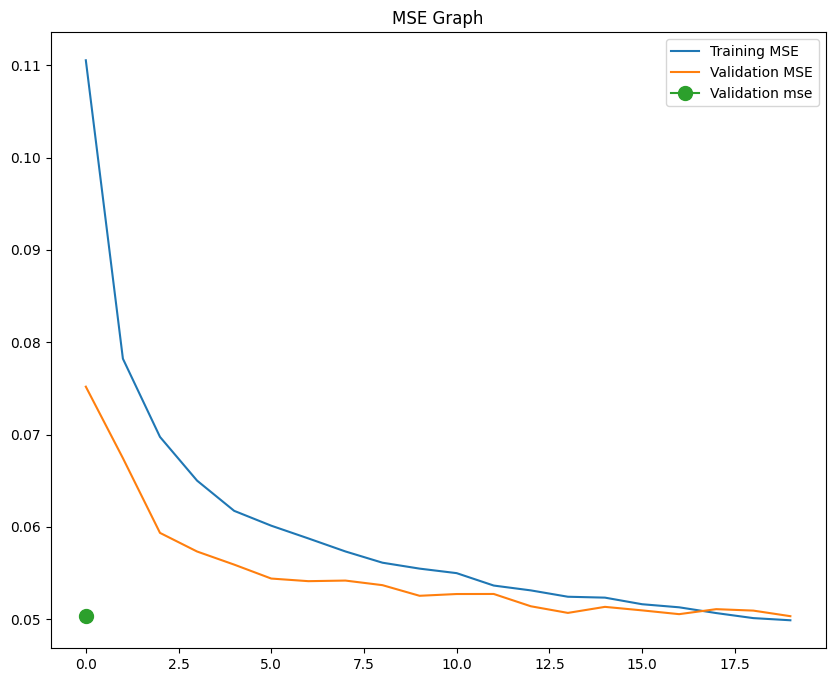

In [229]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(val_mse, label='Validation mse', marker='o', markersize=10)
plt.legend()
plt.title('MSE Graph')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa MSE dari data train, data test, dan data validation cenderung stabil dan tidak terlalu berbeda. Hal ini menunjukkan bahwa model yang telah dibuat tidak overfitting dan tidak underfitting.